In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

In [3]:
df = pd.read_csv('course_page_actions.csv')
df.head()

timestamp      id       group action    duration
0  2016-09-24 17:14:52.012145  261869  experiment   view  130.545004
1  2016-09-24 18:45:09.645857  226546  experiment   view  159.862440
2  2016-09-24 19:16:21.002533  286353  experiment   view   79.349315
3  2016-09-24 19:43:06.927785  842279  experiment   view   55.536126
4  2016-09-24 21:08:22.790333  781883  experiment   view  204.322437

In [4]:
# The duration represents the total number of seconds
# each student spent on the course overview page.

# get the average reading duration for control group
control_mean = df.query('group == "control"')['duration'].mean()

# get the average reading duration for experiment group
experiment_mean = df.query('group == "experiment"')['duration'].mean()

# display average reading duration for each group
control_mean, experiment_mean

(115.40710650582038, 130.93220512539477)

In [5]:
# compute observed difference in reading duration
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

15.525098619574393

In [6]:
# create sampling distribution of difference in average reading durations
# with boostrapping
diffs = []
for _ in range(10000):
    
    b_samp = df.sample(df.shape[0], replace=True)
    control_mean = b_samp.query('group == "control"')['duration'].mean()
    experiment_mean = b_samp.query('group == "experiment"')['duration'].mean()
    diffs.append(experiment_mean - control_mean)

In [7]:
# convert to numpy array
diffs = np.array(diffs)

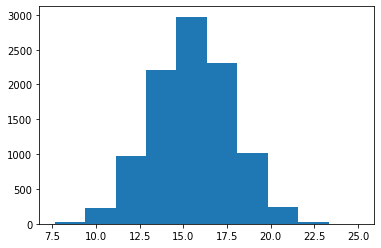

In [8]:
# plot sampling distribution
plt.hist(diffs);

In [9]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

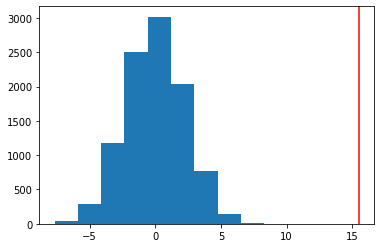

In [10]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff, c='red')

In [11]:
# compute p value
(null_vals > obs_diff).mean()

0.0